# DSC 530 : Final Project 

Bellevue University 
Litschewski, Matthew 
July 2020
RE:  Using Exploratory Data Analysis to evaluate a data set.


In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import thinkstats2
import thinkplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Import data set and convert it a data frame to run EDA 
df = pd.read_csv('Bank1.csv')

df = df.dropna()
df.head()

,age,education,balance,housing,duration,campaign,y
0,58,tertiary,2143,yes,261,1,no
1,44,secondary,29,yes,151,1,no
2,33,secondary,2,yes,76,1,no
3,47,unknown,1506,yes,92,1,no
4,33,unknown,1,no,198,1,no


Variables that will be looked at will be "age", "balance", Campaign, Contact time, and how they and if they effect Desired out come.  Which is the memeber made a deposit transaction. Age, balance, campign and contact time are numerical data desired out come is a binary catogorical (Yes/No).  Historgrams of the variables will be plotted first. Age is the age of the customer, education is the highest reported education obrained by the customer, balance is the balaance in their account at time of data collection, housing is if they have a loan, duration is how long they were engaged for a particular campaign and 'y' is if the campaign was successful.  

In [3]:
#df['education']= df['education'].map({'unknown':1, 'primary': 2, 'secondary': 3, 'tertiary':4}) 
#df['housing'] = df['housing'].map({'yes': 1, 'no':0})
df['y']= df['y'].map({'yes': 1, 'no':0})
# clean data so that all variables are float/int64 

In [4]:
df.describe()

,age,balance,duration,campaign,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.116985
std,10.618762,3044.765829,257.527812,3.098021,0.321406
min,18.000000,-8019.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,1.000000


Given that there is 45,000 entries in this dataset and new random dataset will be created containing only 10,000 entries for ease of computing. 

In [5]:
df_train , df_test = train_test_split(df, test_size=0.9)
df_train.describe()

,age,balance,duration,campaign,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.083831,1328.347711,253.572882,2.821500,0.116125
std,10.536801,3493.947926,258.375160,3.290942,0.320410
min,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,33.000000,71.000000,100.000000,1.000000,0.000000
50%,39.000000,440.000000,178.000000,2.000000,0.000000
75%,49.000000,1356.000000,312.000000,3.000000,0.000000
max,86.000000,102127.000000,3881.000000,51.000000,1.000000


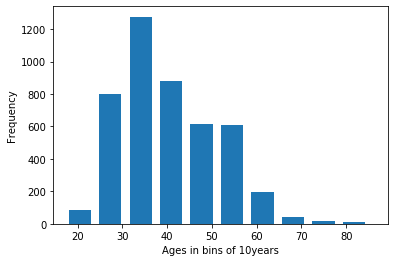

In [6]:
age = df_train['age']
_= plt.hist(age, bins = 10, width = 5)
_=plt.xlabel('Ages in bins of 10years')
_= plt.ylabel( 'Frequency')
plt.show()

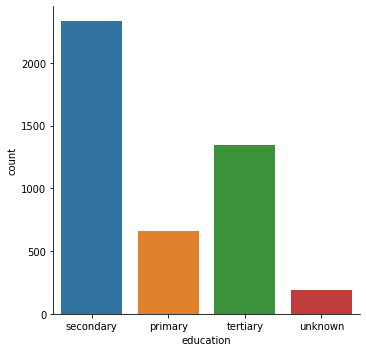

In [7]:
ed = df_train['education']
_= sns.catplot(x='education', kind='count', data = df_train)


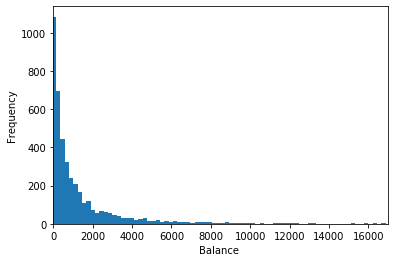

In [8]:
bal = df_train['balance']
bal.plot.hist(bins = 500)
plt.xlim(xmin = 0, xmax = 17000)
_=plt.xlabel('Balance ')
_= plt.ylabel( 'Frequency')
plt.show()

(0, 2000)

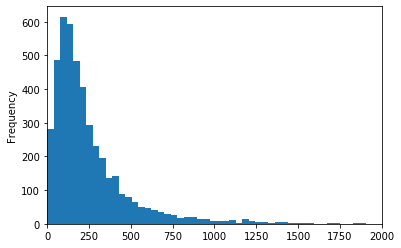

In [9]:
time = df_train['duration']
time.plot.hist(bins = 100)
plt.xlim(xmin = 0, xmax = 2000)


There are two things to really look at which campaigns were the most successful at a positive outcomt and how much time engaging in the client was needed in those particular campaigns to achieve a postive outcome.  Once the most effective outcomes are identified those will be seperated out and used in sepreate predictions.  

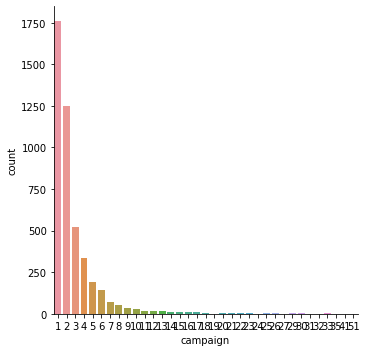

In [10]:
_= sns.catplot(x= 'campaign', kind= 'count', data = df_train )

In [11]:
def ecdf(data):
    """Compute CDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,len(x)+1) / n

    return x, y


In [12]:

def PMF(df):
    l= len(df)
    hist = {}
    for x in df:
        hist[x]=hist.get(x,0)+1
    data = pd.DataFrame.from_dict(hist, orient="index")
    data.columns = ['counts']
    data['PMF']= data['counts']/l
    return data
 

In [13]:
age_df = df_train[df_train.age ==40]
age2_df = df_train[df_train.age!=40]
bal40_df = age_df[age_df.balance> 5000]
bal_df = age2_df[age2_df.balance>5000]

In [14]:
age40_pmf = thinkstats2.Pmf(age_df.duration)
age_pmf = thinkstats2.Pmf(age2_df.duration)
bal40_pmf = thinkstats2.Pmf(bal40_df.balance)
bal_pmf = thinkstats2.Pmf(bal_df.balance)


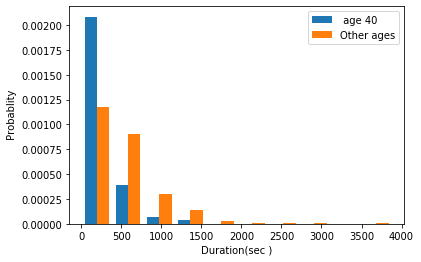

In [15]:
# Histogram of age40 Durations vs all other ages: 
plt.hist([age40_pmf, age_pmf], density = "True",label=[' age 40', 'Other ages'])
plt.legend(loc='upper right')
plt.xlabel('Duration(sec )')
plt.ylabel(' Probablity')
plt.show()


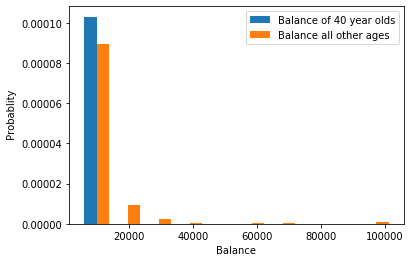

In [16]:
# Histogram of age40 balances vs all other ages: 
plt.hist([bal40_pmf, bal_pmf], density = "True",label=['Balance of 40 year olds', 'Balance all other ages'])
plt.legend(loc='upper right')
plt.xlabel('Balance')
plt.ylabel(' Probablity')
plt.show()



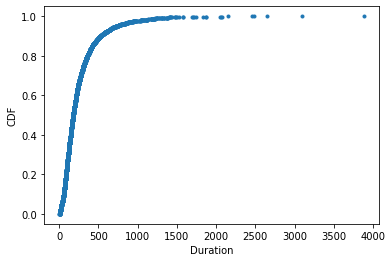

In [17]:
x,y = ecdf(time)
_=plt.plot(x,y, marker = '.', linestyle = 'none')
_=plt.xlabel('Duration')
_=plt.ylabel('CDF')
plt.show()

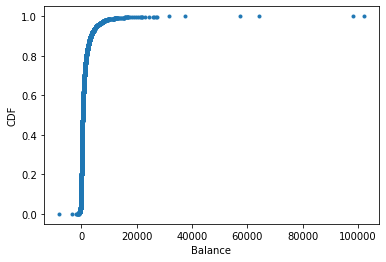

In [18]:
x,y = ecdf(bal)
_=plt.plot(x,y, marker = '.', linestyle = 'none')
_=plt.xlabel('Balance')
_=plt.ylabel('CDF')
plt.show()

## Running an analytic plot of age against normal distribution 

In [19]:
mean = np.mean(age)
std = np.std(age)
samples = np.random.normal(mean, std, size = 20000)
x_thry, y_thry = ecdf(samples)
x,y = ecdf(age)

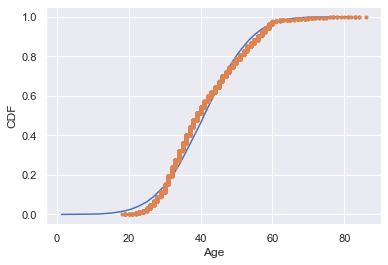

In [20]:
sns.set()
_= plt.plot(x_thry, y_thry)
_= plt.plot(x,y, marker= '.', linestyle = 'none')
_= plt.xlabel("Age")
_= plt.ylabel('CDF')
plt.show()


It would appear from this graph that the age of people in the data set fit the expected normal distribution of ages from a random sampling. There is only a slight deviation around ages 20-25 and 35-40 showing that the banks patrens are slightly higher in these age groups then in others. 

## Scatter plots (2) comparing two variables 

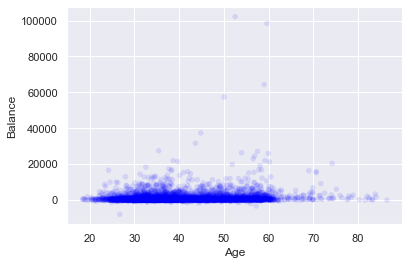

In [22]:

age_j = thinkstats2.Jitter(age,1)
bal_j = thinkstats2.Jitter(bal, 1)
thinkplot.Scatter(age_j, bal_j, alpha = 0.1)
_=plt.xlabel('Age')
_=plt.ylabel("Balance")

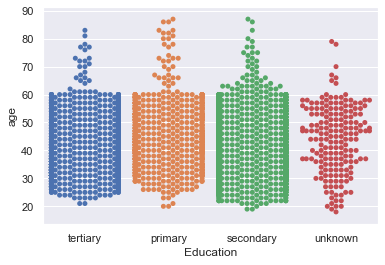

In [98]:
#swarm plot of education and balance
_ = sns.swarmplot(x='education', y='age', data=df_train)
_ = plt.xlabel('Education')
_ = plt.ylabel('age')
plt.show()

# Hypthesis Test 

In [99]:
edUNK = df_train[df_train.education == "unknown"]
edAll = df_train[df_train.education != "unknown"]
ED_bal = edAll['age']
edUNK_bal =edUNK['age']
# Null that the age of those with unknown education is the same as with education. 


In [100]:
sm.stats.ztest(ED_bal, edUNK_bal, alternative = "two-sided")

(-3.969433340184176, 7.204375745108388e-05)

After computing some test statistics the p-value was 1.6e-7 much less than 0.05 meaning the null hypothesis can be rejected. 

# Logistic Regression Analysis 
    The goal is to see if that will certain variables it is possible to predict a positive outcome for 'y'. The variable 'y' is a binomial. 

In [101]:
df_train['y'].value_counts()

0    4036
1     485
Name: y, dtype: int64

In [102]:
count_no_sub = len(df_train[df_train['y']==0])
count_sub = len(df_train[df_train['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 89.27228489272285
percentage of subscription 10.72771510727715


In [124]:

model = smf.logit('y ~ age + duration + balance', data = df_train)
results = model.fit()
print(results.params)

Optimization terminated successfully.
         Current function value: 0.284321
         Iterations 7
Intercept   -3.726694
age          0.008577
duration     0.003512
balance      0.000053
dtype: float64
